In [ ]:
from cvxopt import matrix, log, div, spdiag, solvers

In [ ]:
# example from 
# https://cvxopt.org/userguide/solvers.html#problems-with-nonlinear-objectives
def F(x = None, z = None):
     if x is None:  return 0, matrix(0.0, (3,1))
     if max(abs(x)) >= 1.0:  return None
     u = 1 - x**2
     val = -sum(log(u))
     Df = div(2*x, u).T
     if z is None:  return val, Df
     H = spdiag(2 * z[0] * div(1 + x**2, u**2))
     return val, Df, H

G = matrix([ [0., -1.,  0.,  0., -21., -11.,   0., -11.,  10.,   8.,   0.,   8., 5.],
             [0.,  0., -1.,  0.,   0.,  10.,  16.,  10., -10., -10.,  16., -10., 3.],
             [0.,  0.,  0., -1.,  -5.,   2., -17.,   2.,  -6.,   8., -17.,  -7., 6.] ])
h = matrix([1.0, 0.0, 0.0, 0.0, 20., 10., 40., 10., 80., 10., 40., 10., 15.])
dims = {'l': 0, 'q': [4], 's':  [3]}
sol = solvers.cp(F, G, h, dims)
print(sol['x'])


## try something simple -- maximize call value given constraints

In [148]:
import cvxopt as co
import cvxopt.modeling as mdl
import numpy as np

In [189]:
nX = 21
xgrid = np.linspace(0,100,nX)
strike = 40
prob = mdl.variable(nX, 'prob')
call_payoff = co.matrix(np.maximum(xgrid -strike, 0.0))
# print(call_payoff)
call_value = call_payoff.T*prob
# print(call_value)
total_prob_constraint = (mdl.sum(prob) == 1)
pos_prob_constraint = (prob >= 0)
expected_value_constraint = (co.matrix(xgrid).T*prob == 50)

density_constraint_1 = (mdl.sum(mdl.max(prob - 0.1,0)) <= 0.1)

all_c = [
            total_prob_constraint, 
            pos_prob_constraint, 
            expected_value_constraint,
            density_constraint_1,
         ]

op_problem = mdl.op(call_value, all_c)
print(op_problem.variables(), op_problem.inequalities(), op_problem.equalities())
op_problem.solve()
print(op_problem.status)
print(op_problem.objective.value())
#print(prob.value)

[variable(21,'prob')] [<inequality in R^21>, <scalar inequality>] [<scalar equality>, <scalar equality>]
     pcost       dcost       gap    pres   dres   k/t
 0:  1.8571e+01 -1.4571e+00  2e+01  0e+00  3e-01  1e+00
 1:  1.6287e+01  2.1610e+00  1e+01  3e-16  2e-01  6e-01
 2:  1.2879e+01  1.0170e+01  3e+00  4e-16  4e-02  1e-01
 3:  1.1912e+01  1.0612e+01  1e+00  3e-16  2e-02  3e-02
 4:  1.1494e+01  1.1048e+01  5e-01  1e-16  7e-03  1e-02
 5:  1.1325e+01  1.1220e+01  1e-01  1e-16  2e-03  2e-03
 6:  1.1280e+01  1.1276e+01  4e-03  1e-16  7e-05  8e-05
 7:  1.1278e+01  1.1278e+01  4e-05  1e-16  7e-07  8e-07
 8:  1.1278e+01  1.1278e+01  4e-07  1e-16  7e-09  8e-09
Optimal solution found.
optimal
[ 1.13e+01]



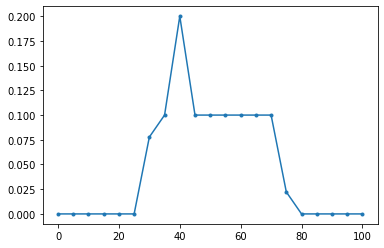

In [190]:
import matplotlib.pyplot as plt
plt.plot(xgrid, prob.value,'.-')
plt.show()

In [ ]:
from setup_min_measure import *
mtg_scale = 1.0
model = setup_model(mtg_scale=mtg_scale,
                    min_prob=0.0, with_plots=False)

berm = setup_berm()
q12_init_v = model.q12.reshape(-1).copy()
q12_init_d = np.diag(q12_init_v)

mtr_rhs = model.standard_constraints(mtg_scale=mtg_scale)
scale = [1e2, 1e4, 1]
mtr_rhs_z = []
for n, (A, rhs) in enumerate(mtr_rhs):
    mtr_rhs_z.append(((A*scale[n]) @ q12_init_d, rhs*scale[n]))


In [ ]:
As = [A for A, r in mtr_rhs_z]
rs = [r.reshape(-1, 1) for A, r in mtr_rhs_z]
big_A = np.vstack(As)
big_r = np.vstack(rs)
print(np.linalg.matrix_rank(big_A), big_A.shape[0])


In [ ]:
U,S,Vh = np.linalg.svd(big_A)

In [ ]:
S


In [ ]:
U[:,0]

In [ ]:
import scipy.linalg as la
rk = sum(np.abs(S) > 1e-16*np.abs(S.max() * max(S.shape)))
print(rk)
B = U[:rk,:rk] @ la.diagsvd(S[:rk],rk, big_A.shape[1]) @ Vh
print(B.shape, np.linalg.matrix_rank(B))

In [ ]:
Ub,Sb,Vhb = np.linalg.svd(B)
Sb

In [ ]:
big_r

In [ ]:
((U.T @ big_r)[:rk])

In [ ]:
U[:,:rk] @ ((U.T @ big_r)[:rk])

In [ ]:
np.allclose(Vh @ Vh.T, np.eye(121))

In [ ]:
#B = U[:rk,:rk] @ la.diagsvd(S[:rk], rk, big_A.shape[1]) @ Vh
B = la.diagsvd(S[:rk], rk, big_A.shape[1]) @ Vh
plt.plot(B[:,::10])
plt.show()

In [ ]:
np.sum(np.abs(B) < 1e-16*np.max(B))

In [ ]:
B[np.abs(B) < 1e-8*np.max(B)] = 0

In [ ]:
np.sum(B == 0)

In [ ]:
np.linalg.matrix_rank(B)

In [ ]:
B.shape

In [ ]:
np.linalg.matrix_rank(U[:rk,:rk])